In [47]:
%reset

import matplotlib.pyplot as pl

import numpy as np
import DMsignal

%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [48]:
mass_DM_MeV = 200000.
channel = 'Tau'

In [49]:
my_DM = DMsignal.DMsignal(channel)

In [50]:
data = np.genfromtxt('AtProduction_gammas.dat', names = True)
print(data.dtype.names)
match = np.where(data['mDM']  == mass_DM_MeV/1000.)
log10x_table = data['Log10x'][match]
dNdlog10x_table = data[channel][match]



('mDM', 'Log10x', 'eL', 'eR', 'e', 'MuL', 'MuR', 'Mu', 'TauL', 'TauR', 'Tau', 'q', 'c', 'b', 't', 'WL', 'WT', 'W', 'ZL', 'ZT', 'Z', 'g', 'Gamma', 'h', 'Nue', 'NuMu', 'NuTau', 'Ve', 'VMu', 'VTau')


In [51]:
E = np.exp(np.linspace(np.log(1000.), np.log(100000.), 1000))
dE = E[1:] - E[:-1]
dNdE = my_DM.get_dNdE(E, channel, mass_DM_MeV)

log10x = np.log10(E/mass_DM_MeV)
dNdx = dNdE*mass_DM_MeV
xx = E/mass_DM_MeV
dNdlog10x = dNdx*xx*np.log(10.)


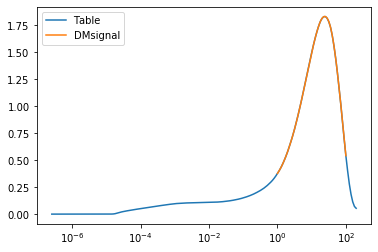

In [52]:
fig, ax = pl.subplots(1,1)

ax.plot((mass_DM_MeV/1000.)*10.**log10x_table, dNdlog10x_table, label = 'Table')
ax.plot((mass_DM_MeV/1000.)*10.**log10x, dNdlog10x, label = 'DMsignal')

ax.legend()

ax.set_xscale('log')
#ax.set_yscale('log')



In [1]:
import elfi
from elfi.examples import ma2

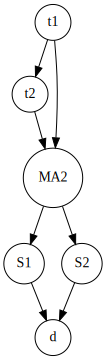

In [5]:
model = ma2.get_model()
elfi.draw(model)

In [7]:
elfi.set_client('multiprocessing')

In [9]:
rej = elfi.Rejection(model, 'd', batch_size =10000, seed = 20170530)
%time result = rej.sample(5000, n_sim = int(1e6))

Progress [==================================================] 100.0% Complete
CPU times: user 348 ms, sys: 36 ms, total: 384 ms
Wall time: 2.89 s
